In [69]:
import pandas as pd
import numpy as np
import datetime as dt
from operator import attrgetter
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors 

# Load Dataset

In [44]:
df = pd.read_csv('Salinan Online Retail Data.csv')

In [45]:
print(df.shape)
print(df.info())
df.describe()

(461773, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      461773 non-null  object 
 1   product_code  461773 non-null  object 
 2   product_name  459055 non-null  object 
 3   quantity      461773 non-null  int64  
 4   order_date    461773 non-null  object 
 5   price         461773 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 24.7+ MB
None


,quantity,price,customer_id
count,461773.000000,461773.000000,360853.000000
mean,9.088892,4.569963,15557.611138
std,86.366467,153.411566,1593.728741
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,14210.000000
50%,3.000000,2.100000,15580.000000
75%,10.000000,4.210000,16938.000000
max,10200.000000,25111.090000,18287.000000


In [46]:
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN
...,...,...,...,...,...,...,...
461768,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,NaN
461769,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,NaN
461770,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,NaN
461771,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,NaN


# Data Cleaning

In [47]:
cleaned_df = df.copy()

In [60]:
# Remove Test Product
cleaned_df = cleaned_df[~cleaned_df['product_code'].str.contains('TEST')]

# Change Product Name to lowercase
cleaned_df['product_name'] = cleaned_df.product_name.str.lower()

# Change quantity into absolute value
cleaned_df['quantity'] = cleaned_df['quantity'].abs()

# Change dtype on order_date column
cleaned_df['order_date'] = cleaned_df['order_date'].astype('datetime64[ns]')

# Remove rows that have negative price
cleaned_df = cleaned_df[cleaned_df.price > 0]

# Remove null value from customer_id column
cleaned_df = cleaned_df[~cleaned_df['customer_id'].isna()]

# Change dtype
cleaned_df['product_code'] = cleaned_df['product_code'].astype('str')
cleaned_df['product_name'] = cleaned_df['product_name'].astype('str')
cleaned_df['customer_id'] = cleaned_df['customer_id'].astype('str')

# Add new columns
cleaned_df['amount'] = cleaned_df['quantity'] * cleaned_df['price']
cleaned_df['year_month'] = cleaned_df['order_date'].dt.to_period('M')

cleaned_df = cleaned_df.reset_index(drop=True)
cleaned_df

,order_id,product_code,product_name,quantity,order_date,price,customer_id,amount,year_month
0,C493411,21539,retro spots butter dish,1,2010-01-04 09:43:00,4.25,14590.0,4.25,2010-01
1,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0,91.80,2010-01
2,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0,51.00,2010-01
3,493414,37508,new england ceramic cake server,2,2010-01-04 10:28:00,2.55,14590.0,5.10,2010-01
4,493414,35001G,hand open shape gold,2,2010-01-04 10:28:00,4.25,14590.0,8.50,2010-01
...,...,...,...,...,...,...,...,...,...
360823,539988,84380,set of 3 butterfly cookie cutters,1,2010-12-23 16:06:00,1.25,18116.0,1.25,2010-12
360824,539988,84849D,hot baths soap holder,1,2010-12-23 16:06:00,1.69,18116.0,1.69,2010-12
360825,539988,84849B,fairy soap soap holder,1,2010-12-23 16:06:00,1.69,18116.0,1.69,2010-12
360826,539988,22854,cream sweetheart egg holder,2,2010-12-23 16:06:00,4.95,18116.0,9.90,2010-12


# User Retention Cohort

In [61]:
df_user_monthly = cleaned_df.groupby(['customer_id','year_month'],as_index=False).agg(order_cnt=('order_id','nunique'))
df_user_monthly

,customer_id,year_month,order_cnt
0,12346.0,2010-01,1
1,12346.0,2010-03,1
2,12346.0,2010-06,2
3,12346.0,2010-10,1
4,12608.0,2010-10,1
...,...,...,...
12195,18286.0,2010-06,1
12196,18286.0,2010-08,1
12197,18287.0,2010-05,1
12198,18287.0,2010-09,2


In [62]:
df_user_monthly['cohort'] = df_user_monthly.groupby('customer_id')['year_month'].transform('min')
df_user_monthly

,customer_id,year_month,order_cnt,cohort
0,12346.0,2010-01,1,2010-01
1,12346.0,2010-03,1,2010-01
2,12346.0,2010-06,2,2010-01
3,12346.0,2010-10,1,2010-01
4,12608.0,2010-10,1,2010-10
...,...,...,...,...
12195,18286.0,2010-06,1,2010-06
12196,18286.0,2010-08,1,2010-06
12197,18287.0,2010-05,1,2010-05
12198,18287.0,2010-09,2,2010-05


In [65]:
df_user_monthly['period'] = (df_user_monthly['year_month'] - df_user_monthly['cohort']).apply(attrgetter('n')) + 1
df_user_monthly

,customer_id,year_month,order_cnt,cohort,period
0,12346.0,2010-01,1,2010-01,1
1,12346.0,2010-03,1,2010-01,3
2,12346.0,2010-06,2,2010-01,6
3,12346.0,2010-10,1,2010-01,10
4,12608.0,2010-10,1,2010-10,1
...,...,...,...,...,...
12195,18286.0,2010-06,1,2010-06,1
12196,18286.0,2010-08,1,2010-06,3
12197,18287.0,2010-05,1,2010-05,1
12198,18287.0,2010-09,2,2010-05,5


In [66]:
df_cohort_pivot = pd.pivot_table(df_user_monthly,values='customer_id',index='cohort',columns='period',aggfunc=pd.Series.nunique)
df_cohort_pivot

period,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,719.0,284.0,338.0,319.0,310.0,310.0,296.0,273.0,292.0,331.0,341.0,254.0
2010-02,462.0,155.0,128.0,165.0,152.0,123.0,121.0,161.0,154.0,168.0,101.0,NaN
2010-03,540.0,146.0,160.0,146.0,140.0,125.0,150.0,189.0,195.0,99.0,NaN,NaN
2010-04,333.0,82.0,76.0,63.0,71.0,80.0,99.0,102.0,51.0,NaN,NaN,NaN
2010-05,275.0,56.0,50.0,53.0,51.0,73.0,66.0,43.0,NaN,NaN,NaN,NaN
2010-06,278.0,55.0,56.0,59.0,64.0,85.0,38.0,NaN,NaN,NaN,NaN,NaN
2010-07,180.0,39.0,37.0,52.0,53.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,160.0,35.0,50.0,48.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,232.0,67.0,61.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
cohort_size = df_cohort_pivot.iloc[:,0]
cohort_size

cohort
2010-01    719.0
2010-02    462.0
2010-03    540.0
2010-04    333.0
2010-05    275.0
2010-06    278.0
2010-07    180.0
2010-08    160.0
2010-09    232.0
2010-10    365.0
2010-11    327.0
2010-12     66.0
Freq: M, Name: 1, dtype: float64

In [68]:
df_cohort_pivot = df_cohort_pivot.divide(cohort_size,axis=0)
df_cohort_pivot

period,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2010-01,1.0,0.394993,0.470097,0.443672,0.431154,0.431154,0.411683,0.379694,0.406120,0.460362,0.474270,0.353268
2010-02,1.0,0.335498,0.277056,0.357143,0.329004,0.266234,0.261905,0.348485,0.333333,0.363636,0.218615,NaN
2010-03,1.0,0.270370,0.296296,0.270370,0.259259,0.231481,0.277778,0.350000,0.361111,0.183333,NaN,NaN
2010-04,1.0,0.246246,0.228228,0.189189,0.213213,0.240240,0.297297,0.306306,0.153153,NaN,NaN,NaN
2010-05,1.0,0.203636,0.181818,0.192727,0.185455,0.265455,0.240000,0.156364,NaN,NaN,NaN,NaN
2010-06,1.0,0.197842,0.201439,0.212230,0.230216,0.305755,0.136691,NaN,NaN,NaN,NaN,NaN
2010-07,1.0,0.216667,0.205556,0.288889,0.294444,0.172222,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.0,0.218750,0.312500,0.300000,0.168750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,1.0,0.288793,0.262931,0.137931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


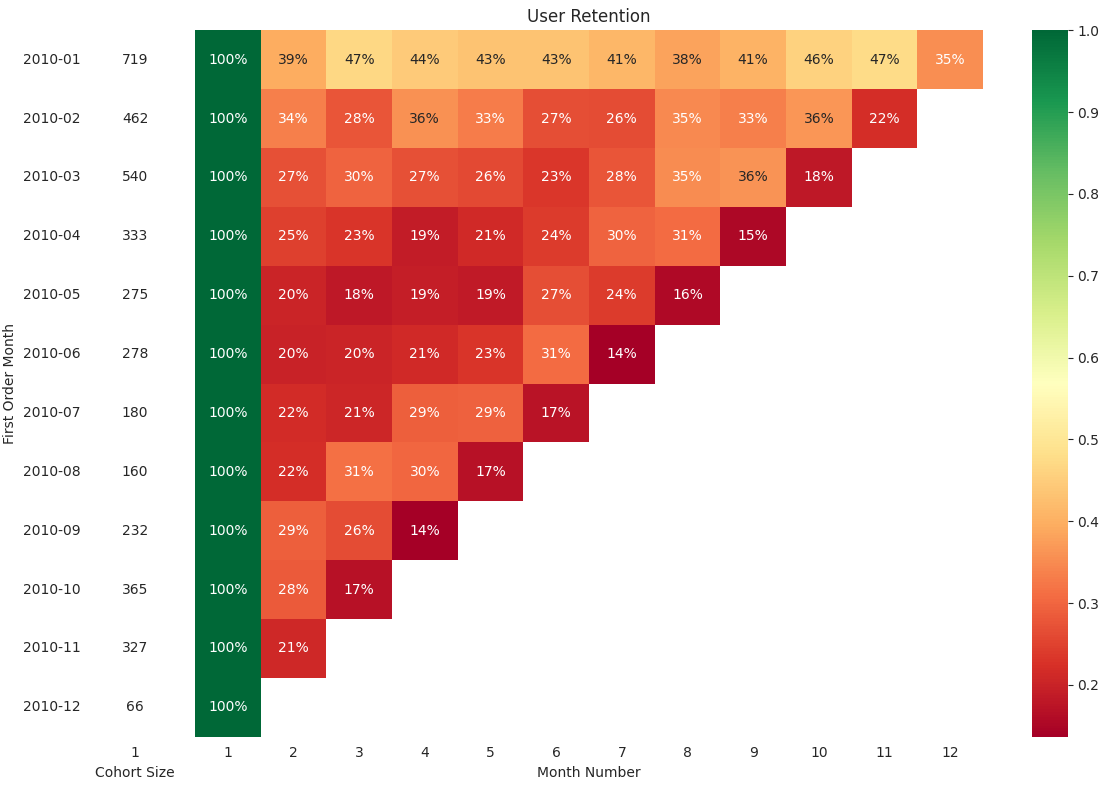

In [91]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(1,2,figsize=(12,8),sharey=True,gridspec_kw={'width_ratios':(1,11)})
    sns.heatmap(df_cohort_pivot,annot=True,ax=ax[1],fmt='.0%',cmap='RdYlGn')
    ax[1].set_title('User Retention')
    ax[1].set_xlabel('Month Number')
    ax[1].set_ylabel('')

    df_cohort_size = pd.DataFrame(cohort_size)
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(df_cohort_size, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])
    ax[0].tick_params(bottom=False)
    ax[0].set(xlabel='Cohort Size', ylabel='First Order Month')
    ax[0].tick_params(axis='y', rotation=0)

    fig.tight_layout()

